In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
df = pd.read_csv('./Self_Organizing_Maps/Credit_Card_Applications.csv')
df.shape

(690, 16)

In [111]:
df.tail()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1
689,15592412,1,41.00,0.040,2,10,4,0.040,0,1,1,0,1,560,1,1


In [112]:
(df['CustomerID'].unique()).shape

(690,)

In [113]:
sp = lambda *x: [i.shape for i in x]

In [114]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
sp(X, y)

[(690, 15), (690,)]

In [115]:
X

array([[  1.57761560e+07,   1.00000000e+00,   2.20800000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.21300000e+03],
       [  1.57395480e+07,   0.00000000e+00,   2.26700000e+01, ...,
          2.00000000e+00,   1.60000000e+02,   1.00000000e+00],
       [  1.56628540e+07,   0.00000000e+00,   2.95800000e+01, ...,
          2.00000000e+00,   2.80000000e+02,   1.00000000e+00],
       ..., 
       [  1.56754500e+07,   0.00000000e+00,   1.88300000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.00000000e+00],
       [  1.57764940e+07,   0.00000000e+00,   2.74200000e+01, ...,
          2.00000000e+00,   1.20000000e+02,   1.20000000e+01],
       [  1.55924120e+07,   1.00000000e+00,   4.10000000e+01, ...,
          1.00000000e+00,   5.60000000e+02,   1.00000000e+00]])

### feature scaling

In [116]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [117]:
X = sc.fit_transform(X)
X.shape

(690, 15)

https://stackoverflow.com/questions/4383571/importing-files-from-different-folder

In [26]:
import sys
sys.path.insert(0,'./Self_Organizing_Maps/')

In [32]:
from minisom import MiniSom
som = MiniSom(10, 10, 15)

In [56]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=10000)

In [57]:
from pylab import bone, pcolor, colorbar, plot, show
%matplotlib inline

In [60]:
som.distance_map()

array([[ 0.365299  ,  0.63653754,  0.53230688,  0.34691926,  0.44783853,
         0.45676866,  0.30243179,  0.27060895,  0.28723862,  0.17882776],
       [ 0.6204405 ,  1.        ,  0.73974587,  0.58799305,  0.7742572 ,
         0.85813995,  0.69006399,  0.51068493,  0.46345782,  0.22975148],
       [ 0.62552371,  0.81509572,  0.48376398,  0.48186797,  0.74134156,
         0.89113285,  0.82851332,  0.72665474,  0.54582821,  0.27693205],
       [ 0.52337233,  0.64115533,  0.38714595,  0.3845986 ,  0.56822952,
         0.78209499,  0.83496388,  0.79424096,  0.70305011,  0.40850516],
       [ 0.38495264,  0.56821097,  0.52404653,  0.53973967,  0.61509992,
         0.69563235,  0.72517206,  0.72408054,  0.6631663 ,  0.36527557],
       [ 0.33259887,  0.60798998,  0.69173694,  0.67313923,  0.56737326,
         0.56893698,  0.66456858,  0.71547917,  0.59811776,  0.28446112],
       [ 0.39462573,  0.62897538,  0.71004943,  0.6735571 ,  0.4532087 ,
         0.43333217,  0.55227338,  0.69701951

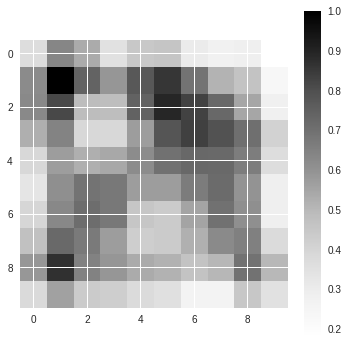

In [79]:
plt.figure(figsize=((6,6)))
plt.imshow(som.distance_map())
plt.colorbar()

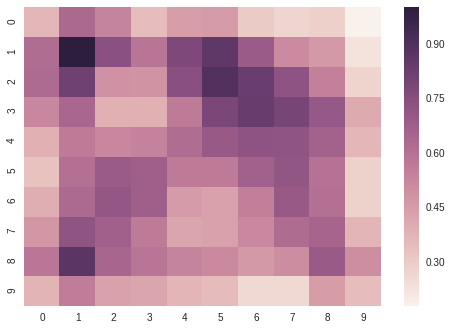

In [72]:
import seaborn as sns
sns.heatmap(som.distance_map())

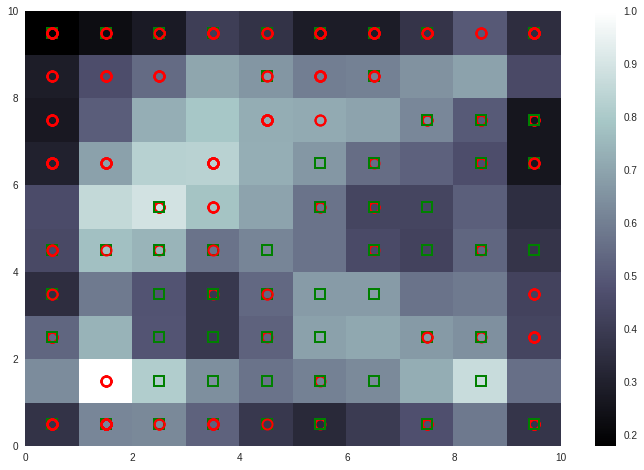

In [89]:
plt.figure(figsize=((12,8)))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors=['r','g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+.5,
         w[1]+.5,
         markers[y[i]],
        markeredgecolor=colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()

In [92]:
mappings=som.win_map(X)
len(mappings), type(mappings)

(73, collections.defaultdict)

In [94]:
# mappings

In [101]:
frauds = np.concatenate([mappings[(1,1)], mappings[(1,8)]])
frauds

array([[  3.15297783e-01,   0.00000000e+00,   6.64661654e-02,
          3.57142857e-01,   0.00000000e+00,   7.69230769e-01,
          8.75000000e-01,   5.78947368e-03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.00000000e-01,   1.70000000e-01,   0.00000000e+00],
       [  1.13102603e-01,   0.00000000e+00,   1.20300752e-01,
          6.25000000e-02,   0.00000000e+00,   3.07692308e-01,
          2.50000000e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.00000000e-01,   8.00000000e-02,   0.00000000e+00],
       [  2.56421961e-01,   0.00000000e+00,   1.59097744e-01,
          8.92857143e-02,   0.00000000e+00,   1.53846154e-01,
          5.00000000e-01,   1.57894737e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.00000000e-01,   1.00000000e-01,   4.56000000e-03],
       [  1.09258436e-01,   0.00000000e+00,   2.70676692e-01,
     

In [107]:
sc.inverse_transform?

In [108]:
X

array([[  8.42681467e-01,   1.00000000e+00,   1.25263158e-01, ...,
          5.00000000e-01,   5.00000000e-02,   1.21200000e-02],
       [  6.96090562e-01,   0.00000000e+00,   1.34135338e-01, ...,
          5.00000000e-01,   8.00000000e-02,   0.00000000e+00],
       [  3.88981656e-01,   0.00000000e+00,   2.38045113e-01, ...,
          5.00000000e-01,   1.40000000e-01,   0.00000000e+00],
       ..., 
       [  4.39420332e-01,   0.00000000e+00,   7.63909774e-02, ...,
          5.00000000e-01,   5.00000000e-02,   0.00000000e+00],
       [  8.44034934e-01,   0.00000000e+00,   2.05563910e-01, ...,
          5.00000000e-01,   6.00000000e-02,   1.10000000e-04],
       [  1.06907888e-01,   1.00000000e+00,   4.09774436e-01, ...,
          0.00000000e+00,   2.80000000e-01,   0.00000000e+00]])

In [119]:
sc.inverse_transform(frauds)

array([[  1.56444530e+07,   0.00000000e+00,   1.81700000e+01,
          1.00000000e+01,   1.00000000e+00,   1.10000000e+01,
          8.00000000e+00,   1.65000000e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   3.40000000e+02,   1.00000000e+00],
       [  1.55939590e+07,   0.00000000e+00,   2.17500000e+01,
          1.75000000e+00,   1.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.60000000e+02,   1.00000000e+00],
       [  1.56297500e+07,   0.00000000e+00,   2.43300000e+01,
          2.50000000e+00,   1.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   4.50000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+02,   4.57000000e+02],
       [  1.55929990e+07,   0.00000000e+00,   3.17500000e+01,
     